# Cropping digits for digital

This notebook is intended to crop the digits in the images of digital numbers, particularly the HQ ones.
The final output is a hierarchy of folders where the crops of each digit in the images are stored.

In the last section of the file "DigitCrop_Digital_Preprocessing.ipynb" you can find different processing methods we have tried to find the contours around the digits. However, this methods proved to not work as desired. Therefore, the approach presented below.

Packages

In [1]:
import cv2
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

%matplotlib inline

First, we isolated the screens that contain the numbers. From these images, we can compute the distribution in width-height ratio.

Text(0.5,0,'Width-height ratios')

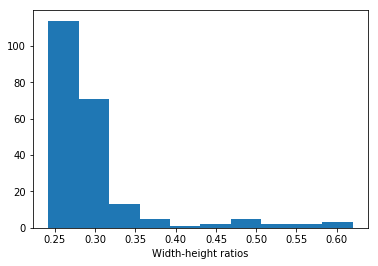

In [4]:
path = 'Dataset/HQ_digital_processed'

#others =[]
ratios = []
for file in os.listdir(path):
    image = cv2.imread(os.path.join(path,file))
    sh = image.shape
    ratio = sh[0]/sh[1]
    ratios.append(ratio)
    #if ratio > 0.4:
    #    others.append(os.path.join(path,file))
    
plt.hist(ratios)
plt.xlabel("Width-height ratios")

We can see that most screens verify certain proportions. Hence, we build some heuristics based on this.

In [7]:
def splitting(image):
    '''
    Function to split the screen image on different parts.
    
        image -- array with the image pixel values
        
    Returns list of contours within the screen
    '''
    sh = image.shape
    ratio = sh[0]/sh[1]
    
    # We build conditions based on range of ratios based on the distribution
    # Most images are below the 0.31 threshold
    if ratio < 0.31:
        splits = 5.4  # Number of splits of the screen from right-hand side
        delta = sh[1]/splits
        contours = []
        for i in range(int(np.ceil(splits))):
            # First split is bigger since there is more space due to slightly rotated images
            if i > 1:
                contours.append([sh[1] - int(delta*0.9)*(i+1),1, sh[1]- int(delta*0.9)*(i), sh[0]-1])
            elif i == 1:
                contours.append([sh[1] - int(delta*0.9)*(i+1),1, sh[1]- int(delta)*(i), sh[0]-1])
            else:
                contours.append([sh[1] - int(delta)*(i+1),1, sh[1]- int(delta)*(i), sh[0]-1])
        
    elif ratio < 0.4:
        splits = 5.3
        delta = sh[1]/splits
        contours=[[sh[1] - int(delta)*(i+1),1, sh[1]- int(delta)*(i), sh[0]-1] 
                  for i in range(int(np.ceil(splits)))]
    
    # Typically, bigger ratios contain less digits
    else:
        splits = 3
        delta = sh[1]/splits
        contours=[[sh[1] - int(delta)*(i+1),1, sh[1] - int(delta)*(i), sh[0]-1] 
                  for i in range(int(np.ceil(splits)))]
    
    return contours

Simple example

Ratio:  0.2821813570069753


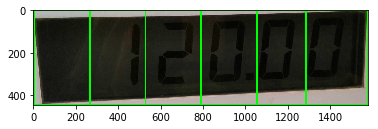

In [6]:
path = 'Dataset/HQ_digital_processed/0086c28630535f9d722eed740f9ce3f8336ec432_cropped.jpg'

image = cv2.imread(path)
sh = image.shape
print("Ratio: ", sh[0]/sh[1])

contours = splitting(image)
for contour in contours:
    image = cv2.rectangle(image, (contour[0], contour[1]), (contour[2], contour[3]) ,(0,255,0),5)
imshow(image)